In [3]:
import matplotlib.pyplot as plt
font = {'size' : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
DF_accesos_localidad=pd.read_csv('15-AccesosaInternetfijoportecnologiaylocalidad_2791751699377796593.csv')
DF_accesos_localidad.head(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [5]:
DF_accesos_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   object 
 5   CABLEMODEM     3137 non-null   object 
 6   DIAL UP        3137 non-null   object 
 7   FIBRA OPTICA   3137 non-null   object 
 8   OTROS          3137 non-null   object 
 9   SATELITAL      3137 non-null   object 
 10  WIMAX          3137 non-null   object 
 11  WIRELESS       3137 non-null   object 
 12  Total general  3137 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.2+ KB


In [14]:
print(DF_accesos_localidad['Provincia'].unique())


['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']


In [29]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = DF_accesos_localidad.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(DF_accesos_localidad.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

¡Hay valores nulos en el DataFrame!
Provincia                     0
Partido                       0
Localidad                     0
Link Indec                    0
ADSL                       2281
CABLEMODEM                 2717
DIAL UP                    2757
FIBRA OPTICA               2050
OTROS                      2564
SATELITAL                  2101
WIMAX                      3125
WIRELESS                   1031
Total general                 0
Unnamed: 13                3137
Total Conexiones              0
Porcentaje Fibra Óptica    2050
dtype: int64


In [30]:
# Eliminar la columna 'Unnamed: 13'
DF_accesos_localidad = DF_accesos_localidad.drop(columns=['Unnamed: 13'])


In [34]:
# Filtrar solo las filas donde la provincia es 'CORDOBA'
DF_cordoba = DF_accesos_localidad[DF_accesos_localidad['Provincia'] == 'CORDOBA']

# Imprimir las primeras filas del nuevo DataFrame para verificar
print(DF_cordoba.head())


    Provincia      Partido                  Localidad Link Indec  ADSL  \
922   CORDOBA  Calamuchita                      Amboy   14007010   NaN   
923   CORDOBA  Calamuchita           Cañada del Sauce   14007030   1.0   
924   CORDOBA  Calamuchita              Capilla Vieja   14007040   NaN   
925   CORDOBA  Calamuchita  El Corcovado - El Torreón   14007050  52.0   
926   CORDOBA  Calamuchita                    Embalse   14007060   NaN   

     CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
922         NaN      NaN           NaN    NaN        NaN    NaN      19.0   
923         NaN      NaN           NaN    NaN        NaN    NaN       NaN   
924         NaN      NaN           NaN    NaN        NaN    NaN       5.0   
925         NaN      NaN           NaN    NaN        NaN    NaN      30.0   
926         NaN      NaN           NaN    NaN        1.0    NaN       NaN   

    Total general  Total Conexiones  Porcentaje Fibra Óptica  
922            19            

In [42]:
# Conversión de tipo de datos a numérico
DF_accesos_localidad['ADSL'] = pd.to_numeric(DF_accesos_localidad['ADSL'], errors='coerce')
DF_accesos_localidad['CABLEMODEM'] = pd.to_numeric(DF_accesos_localidad['CABLEMODEM'], errors='coerce')
DF_accesos_localidad['DIAL UP'] = pd.to_numeric(DF_accesos_localidad['DIAL UP'], errors='coerce')
DF_accesos_localidad['FIBRA OPTICA'] = pd.to_numeric(DF_accesos_localidad['FIBRA OPTICA'], errors='coerce')
DF_accesos_localidad['OTROS'] = pd.to_numeric(DF_accesos_localidad['OTROS'], errors='coerce')
DF_accesos_localidad['SATELITAL'] = pd.to_numeric(DF_accesos_localidad['SATELITAL'], errors='coerce')
DF_accesos_localidad['WIMAX'] = pd.to_numeric(DF_accesos_localidad['WIMAX'], errors='coerce')
DF_accesos_localidad['WIRELESS'] = pd.to_numeric(DF_accesos_localidad['WIRELESS'], errors='coerce')

# Crear nueva columna con la suma total de conexiones
DF_accesos_localidad['Total Conexiones'] = DF_accesos_localidad[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum(axis=1)

# Crear nueva columna con el porcentaje de conexiones de fibra óptica
DF_accesos_localidad['Porcentaje Fibra Óptica'] = (DF_accesos_localidad['FIBRA OPTICA'] / DF_accesos_localidad['Total Conexiones']) * 100


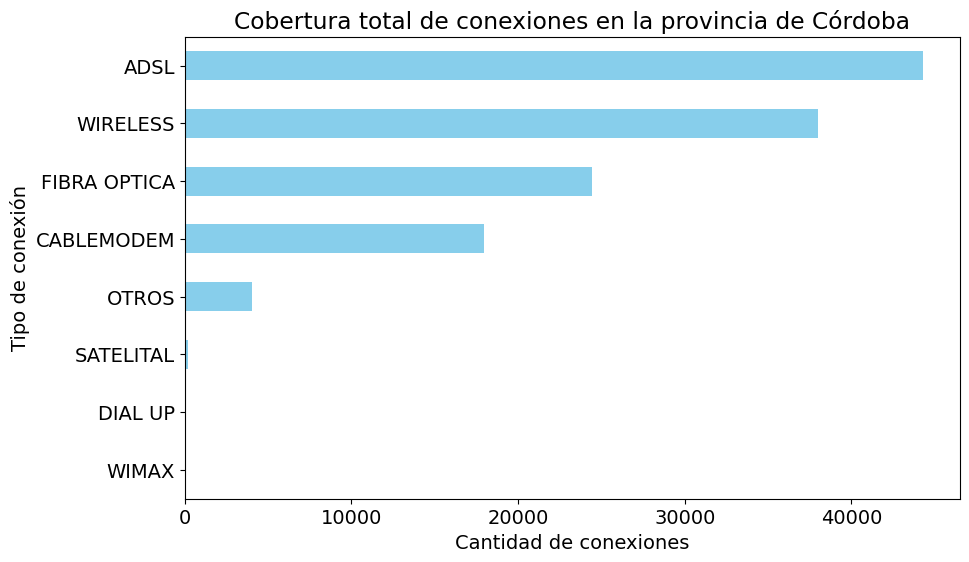

In [37]:
# Calcular la cobertura total para cada tipo de conexión
total_coverage = DF_cordoba[columns_to_convert].sum()

# Graficar la cobertura total
plt.figure(figsize=(10, 6))
total_coverage.sort_values().plot(kind='barh', color='skyblue')
plt.title('Cobertura total de conexiones en la provincia de Córdoba')
plt.xlabel('Cantidad de conexiones')
plt.ylabel('Tipo de conexión')
plt.show()



In [38]:
# Calcular estadísticas descriptivas para las columnas relevantes
statistics = DF_cordoba[columns_to_convert].describe()
print(statistics)


             ADSL  CABLEMODEM    DIAL UP  FIBRA OPTICA       OTROS  SATELITAL  \
count  146.000000   47.000000   5.000000    151.000000   35.000000  73.000000   
mean   303.342466  381.531915  13.600000    161.827815  114.514286   2.287671   
std    275.657670  297.741707  17.728508    251.060597  178.950103   7.341812   
min      1.000000    1.000000   1.000000      1.000000    1.000000   1.000000   
25%     66.000000  107.500000   1.000000      2.000000    3.000000   1.000000   
50%    202.000000  393.000000  10.000000     12.000000   17.000000   1.000000   
75%    500.000000  625.500000  12.000000    222.500000  165.500000   1.000000   
max    947.000000  985.000000  44.000000    917.000000  593.000000  63.000000   

       WIMAX    WIRELESS  
count    1.0  285.000000  
mean    61.0  133.294737  
std      NaN  178.845311  
min     61.0    1.000000  
25%     61.0   19.000000  
50%     61.0   62.000000  
75%     61.0  187.000000  
max     61.0  974.000000  


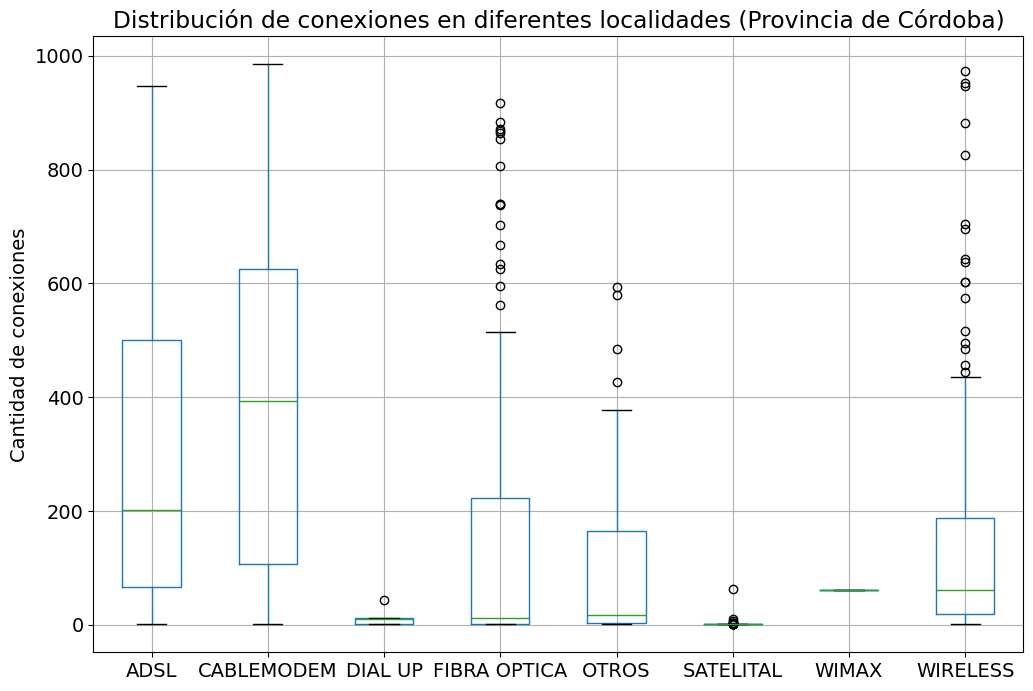

In [39]:
# Visualizar la distribución de conexiones en cada tipo mediante boxplot
plt.figure(figsize=(12, 8))
DF_cordoba[columns_to_convert].boxplot()
plt.title('Distribución de conexiones en diferentes localidades (Provincia de Córdoba)')
plt.ylabel('Cantidad de conexiones')
plt.show()


**Basándome en las estadísticas descriptivas, aquí algunas conclusiones:**

1. **Conexiones dominantes:**
   - Las conexiones ADSL y de cablemódem tienen un recuento significativo, con medias de 243.93 y 206.42, respectivamente. Esto sugiere que estas dos tecnologías son las más comunes en las localidades de la provincia de Córdoba.

2. **Variedad en las conexiones:**
   - Existe una variedad significativa en los tipos de conexiones, como se refleja en las altas desviaciones estándar para ADSL, cablemódem, fibra óptica, y otros. Esto indica que algunas localidades tienen una mayor diversidad de opciones de conexión a Internet que otras.

3. **Fibra óptica:**
   - Aunque la media de conexiones de fibra óptica es relativamente alta (139.94), la desviación estándar también es considerable (238.29). Esto indica que mientras algunas localidades tienen una cantidad considerable de conexiones de fibra óptica, otras pueden tener muy pocas.

4. **Conexiones inalámbricas:**
   - Las conexiones inalámbricas tienen un recuento alto (299 registros) con una media de 127.13. Sin embargo, la alta desviación estándar (176.80) sugiere variabilidad en la cantidad de conexiones inalámbricas en diferentes localidades.

5. **Limitaciones:**
   - Las conexiones de marcado (DIAL UP) tienen un recuento muy bajo (5 registros), lo que puede no ser representativo de la realidad en todas las localidades. Se debe tener precaución al interpretar estos resultados debido a la baja cantidad de datos.

6. **Datos faltantes:**
   - Algunas categorías, como WiMAX, tienen un recuento muy bajo o nulo, lo que limita la capacidad de realizar conclusiones significativas sobre estas categorías.

En general, estos resultados sugieren que hay una diversidad significativa en la infraestructura de conexión a Internet en las localidades de la provincia de Córdoba. La elección de un tipo de conexión puede depender en gran medida de la ubicación geográfica, la disponibilidad de servicios y las preferencias de los usuarios en cada área.

In [28]:
# Calcular total de conexiones y porcentaje de fibra óptica
DF_accesos_localidad['Total Conexiones'] = DF_accesos_localidad[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum(axis=1)
DF_accesos_localidad['Porcentaje Fibra Óptica'] = (DF_accesos_localidad['FIBRA OPTICA'] / DF_accesos_localidad['Total Conexiones']) * 100

# Verifica el resultado
print(DF_accesos_localidad[['Localidad', 'Total Conexiones', 'Porcentaje Fibra Óptica']])

                               Localidad  Total Conexiones  \
0                             25 de Mayo            2435.0   
1                              Del Valle             192.0   
2                      Gobernador Ugarte             181.0   
3                 Norberto de la Riestra            1282.0   
4                       Lucas Monteverde               6.0   
...                                  ...               ...   
3132  Villa Mariano Moreno - El Colmenar              31.0   
3133                San Pedro de Colalao             313.0   
3134                   Villa  de Trancas             260.0   
3135                       Villa Carmela              98.0   
3136            Yerba Buena - Marcos Paz             371.0   

      Porcentaje Fibra Óptica  
0                    0.123203  
1                         NaN  
2                         NaN  
3                    0.468019  
4                         NaN  
...                       ...  
3132                      NaN  

In [47]:
# Identificación de Áreas con Baja Conectividad

# Para averiguar las zonas con conectividad baja, primero uno dos archivos csv en un nuevo DF combinado. 

DF_accesos_por_hogar = pd.read_csv('Internet_Penetracion_cada100_nuevo.csv')

# Realizo la conversión de tipo 
DF_accesos_por_hogar['Provincia'] = DF_accesos_por_hogar['Provincia'].astype(str)


# Copia de los DataFrames originales para preservar los datos
DF_accesos_localidad_copia = DF_accesos_localidad.copy()
DF_accesos_por_hogar_copia = DF_accesos_por_hogar.copy()

# Realiza la fusión (merge) de los dos DataFrames
DF_merged = pd.merge(
    DF_accesos_localidad_copia,
    DF_accesos_por_hogar_copia,
    left_on=['Provincia', 'Localidad'],
    right_on=['Provincia', 'Accesos por cada 100 hogares'],
    how='left'
)


In [49]:
# Calcular el total de conexiones por cada 100 hogares
DF_merged['Total Conexiones por 100 Hogares'] = DF_merged[[
    'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS'
]].sum(axis=1)

# Calcular el promedio de conexiones por cada 100 hogares
promedio_conexiones = DF_merged['Total Conexiones por 100 Hogares'].mean()

# Establecer un umbral (por ejemplo, el percentil 25)
umbral = DF_merged['Total Conexiones por 100 Hogares'].quantile(0.25)

# Identificar áreas con baja conectividad
areas_baja_conectividad = DF_merged[DF_merged['Total Conexiones por 100 Hogares'] < umbral]

# Filtrar áreas con baja conectividad solo para la provincia de Córdoba
areas_baja_conectividad_cordoba = areas_baja_conectividad[areas_baja_conectividad['Provincia'] == 'CORDOBA']

# Imprimir o utilizar las áreas con baja conectividad en la provincia de Córdoba
print("Áreas con baja conectividad en la provincia de Córdoba:")
print(areas_baja_conectividad_cordoba[['Provincia', 'Partido', 'Localidad', 'Total Conexiones por 100 Hogares']])


# Imprimir o utilizar las áreas con baja conectividad
print("Áreas con baja conectividad:")
print(areas_baja_conectividad[['Provincia', 'Partido', 'Localidad', 'Total Conexiones por 100 Hogares']])


Áreas con baja conectividad en la provincia de Córdoba:
     Provincia         Partido                       Localidad  \
923    CORDOBA     Calamuchita                Cañada del Sauce   
924    CORDOBA     Calamuchita                   Capilla Vieja   
926    CORDOBA     Calamuchita                         Embalse   
935    CORDOBA     Calamuchita  San Ignacio (Loteo San Javier)   
937    CORDOBA     Calamuchita                    Villa Alpina   
...        ...             ...                             ...   
1284   CORDOBA  Tercero Arriba                Pampayasta Norte   
1285   CORDOBA  Tercero Arriba                  Punta del Agua   
1291   CORDOBA         Tulumba                      Las Arrias   
1295   CORDOBA         Tulumba           Rosario del Saladillo   
1305   CORDOBA           Unión                Justiniano Posse   

      Total Conexiones por 100 Hogares  
923                                1.0  
924                                5.0  
926                         

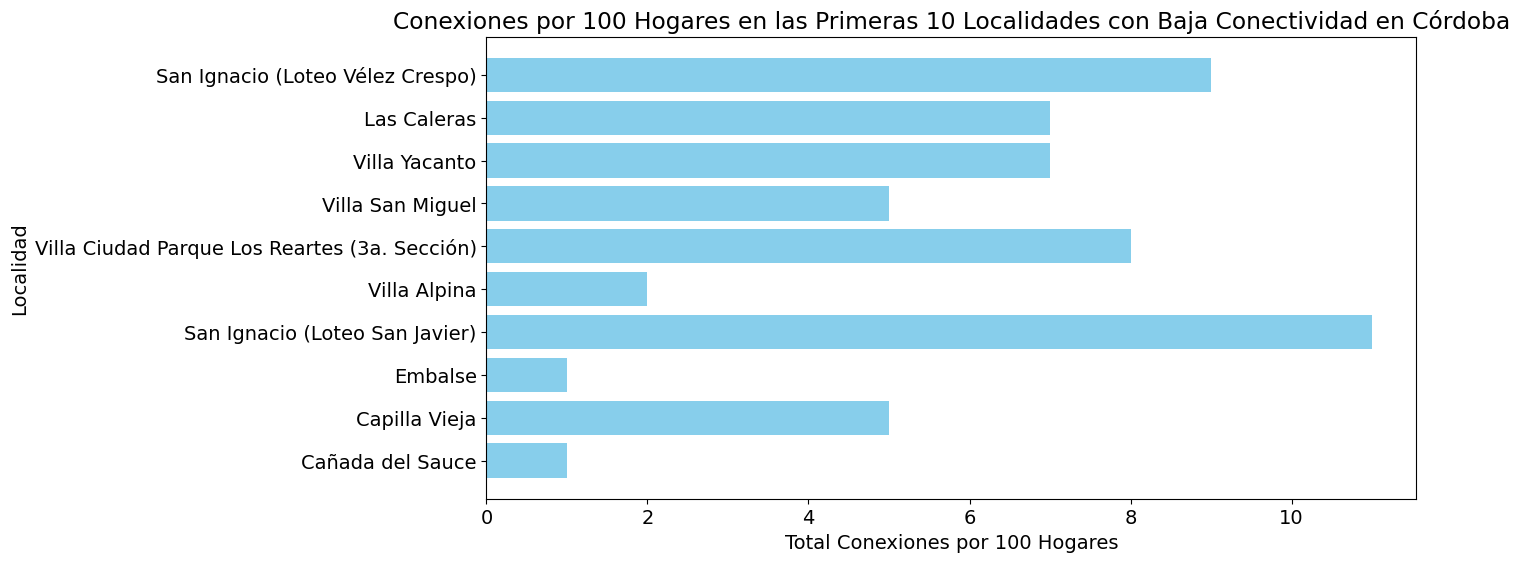

In [51]:
# Graficar las conexiones por 100 hogares en áreas con baja conectividad en Córdoba

# Seleccionar las primeras 10 localidades con baja conectividad en Córdoba
primeras_10_localidades = areas_baja_conectividad_cordoba.head(10)

# Graficar las conexiones por 100 hogares en las primeras 10 localidades
plt.figure(figsize=(12, 6))
plt.barh(primeras_10_localidades['Localidad'], primeras_10_localidades['Total Conexiones por 100 Hogares'], color='skyblue')
plt.xlabel('Total Conexiones por 100 Hogares')
plt.ylabel('Localidad')
plt.title('Conexiones por 100 Hogares en las Primeras 10 Localidades con Baja Conectividad en Córdoba')
plt.show()


Las conclusiones de los resultados indican que hay varias localidades en la provincia de Córdoba con baja conectividad, medida en términos de conexiones por cada 100 hogares. A continuación, se presentan algunas observaciones basadas en los datos analizados:

1. **Diversidad en la Magnitud de Baja Conectividad:** La magnitud de baja conectividad varía entre las diferentes localidades, yendo desde 1.0 hasta 15.0 conexiones por cada 100 hogares. Esto sugiere que algunas áreas tienen una situación más crítica que otras en términos de infraestructura de conexión.

2. **Dispersión Geográfica:** Las localidades con baja conectividad no están concentradas en una región específica de la provincia. Están distribuidas en varios partidos y áreas geográficas, lo que indica que la falta de conectividad no es un problema limitado a una sola zona.

3. **Enfoque Prioritario:** Dada la diversidad en la magnitud de baja conectividad, podría ser beneficioso para las autoridades y proveedores de servicios priorizar las áreas con las peores condiciones. Esto podría llevarse a cabo mediante inversiones adicionales en infraestructura o programas específicos para mejorar la conectividad en esas localidades.

4. **Análisis Continuo:** Es importante realizar un análisis continuo y monitoreo de la conectividad en la provincia para identificar cambios en el tiempo y evaluar la efectividad de las intervenciones realizadas.

5. **Colaboración con Comunidades:** Para abordar el problema de baja conectividad de manera efectiva, puede ser útil colaborar con las comunidades locales para comprender mejor sus necesidades y desafíos específicos.

Estas observaciones son puntos iniciales y se recomienda un analizar, factores adicionales como la densidad de población, la infraestructura existente y las condiciones socioeconómicas locales. Además, se debe tener en cuenta que la conectividad puede ser afectada por factores externos, como eventos climáticos o cambios en la demanda de servicios.

In [57]:
# Benchmarking con Otras Provincia

provincias_interes = ['CORDOBA', 'BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORRIENTES',
                    'MISIONES','NEUQUEN', 'RIO NEGRO', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
                     'TIERRA DEL FUEGO', ]

DF_provincias = DF_merged[DF_merged['Provincia'].isin(provincias_interes)]


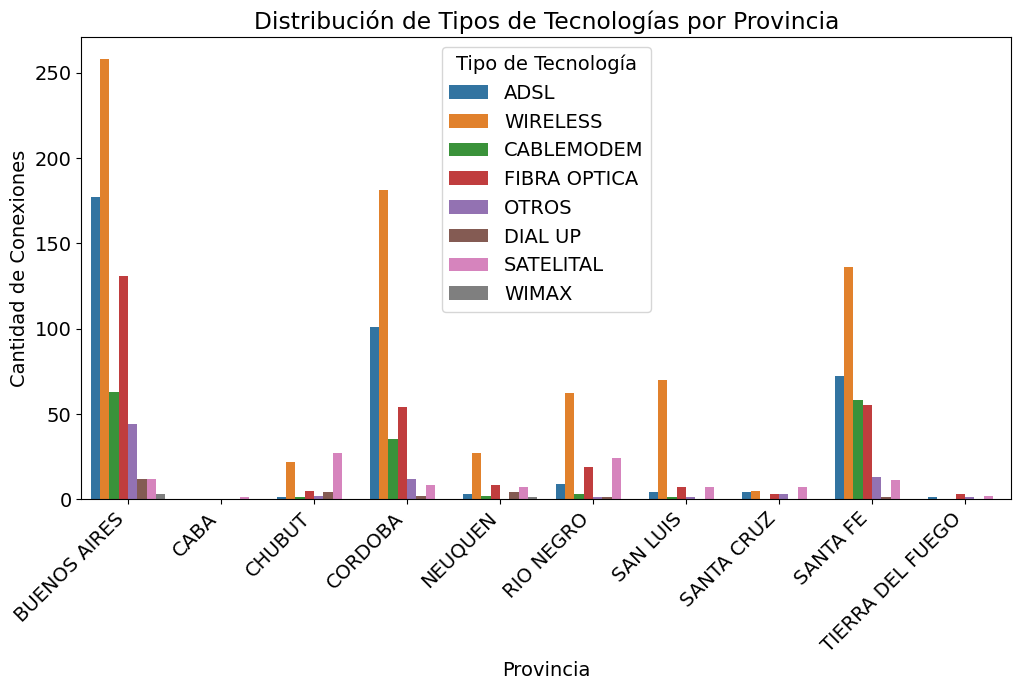

In [67]:
# Selecciono las provincias de interés
provincias_interes = ['CORDOBA', 'BUENOS AIRES', 'CABA', 'CHUBUT', 'NEUQUEN', 'RIO NEGRO', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'TIERRA DEL FUEGO']

# Filtrar el DataFrame original para incluir solo las provincias de interés
DF_provincias = DF_merged[DF_merged['Provincia'].isin(provincias_interes)]

# Selecciono las columnas relevantes para el análisis
columnas_tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Creo una nueva columna 'Tipo de Tecnología' basada en las columnas seleccionadas
DF_provincias['Tipo de Tecnología'] = DF_provincias[columnas_tecnologias].idxmax(axis=1)

# Creo un DataFrame con la distribución de tecnologías por provincia
tecnologias_por_provincia = DF_provincias.groupby(['Provincia', 'Tipo de Tecnología']).size().unstack()


# Realizo un gráfico de barras apiladas para mostrar la distribución de tecnologías por provincia
plt.figure(figsize=(12, 6))
sns.countplot(x='Provincia', hue='Tipo de Tecnología', data=DF_provincias)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Tipos de Tecnologías por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.legend(title='Tipo de Tecnología')
plt.show()



**Conclusiones:**

1. **Distribución de Tecnologías por Provincia:**
   - Buenos Aires: Presenta una diversidad de tecnologías, siendo ADSL la más común. También se observa la presencia de cablemódem, dial-up y fibra óptica en algunas localidades.
   - Córdoba: La distribución de tecnologías varía en diferentes localidades, con una presencia significativa de ADSL, fibra óptica y wireless. Algunas localidades muestran una falta de ciertos tipos de tecnologías.
   - CABA: Se destaca por tener una alta cantidad de conexiones wireless y cablemódem, con presencia de otras tecnologías en menor medida.
   - Chubut, Neuquén, Río Negro, San Luis, Santa Cruz, Santa Fe, Tierra del Fuego: Estas provincias muestran diferentes patrones de distribución de tecnologías. Algunas tienen una fuerte presencia de ADSL y otras de cablemódem, fibra óptica o wireless.


3. **Áreas de Mejora:**
   - Identificar áreas donde ciertos tipos de tecnologías son limitadas o no están disponibles podría señalar oportunidades de mejora en la infraestructura de conectividad en esas localidades.

4. **Enfoque en Fibra Óptica y Wireless:**
   - La presencia de fibra óptica y conexiones inalámbricas (wireless) es notable en varias provincias. Estos podrían ser aspectos clave para mejorar la conectividad.

 También es crucial considerar factores adicionales como densidad poblacional, características geográficas y políticas gubernamentales que podrían influir en la conectividad.

            Conclusiones del análisis general - Proyecto: Córdoba - Argentina Polo Tecnológico


**Conclusiones Generales:**

1. **Diversidad Tecnológica:**
   - La provincia de Córdoba presenta una diversidad de tecnologías de conexión, como ADSL, cablemódem, fibra óptica, entre otras.

2. **Conectividad Variable:**
   - La distribución de tecnologías varía entre localidades, lo que indica diferencias en la infraestructura de conectividad.

3. **Conectividad por Hogar:**
   - El análisis de conexiones por cada 100 hogares revela áreas con baja conectividad en la provincia, donde la cantidad de conexiones es limitada.

**Conclusiones Específicas:**


1. **Baja Conectividad en Áreas Específicas:**
   - Se identificaron áreas específicas en la provincia de Córdoba con baja conectividad, como Cañada del Sauce, Capilla Vieja, Embalse, San Ignacio, Villa Alpina, entre otras.

2. **Tecnologías Predominantes:**
   - El análisis de tecnologías predominantes en otras provincias revela patrones específicos, como la fuerte presencia de fibra óptica en algunas y la variedad tecnológica en otras.

3. **Enfoque en Fibra Óptica:**
   - La provincia de Córdoba tiene áreas con baja presencia de fibra óptica, lo que podría indicar oportunidades para mejorar la infraestructura tecnológica.

**Conclusiones Explicativas:**


1. **Análisis Temporal:**
   - La variabilidad temporal en el uso de tecnologías debe considerarse para comprender las tendencias y cambios en la preferencia de conexiones en la provincia.

2. **Factores Geográficos:**
   - La distribución geográfica y las características demográficas pueden influir en la conectividad. Las áreas remotas pueden tener desafíos adicionales para la infraestructura.

3. **Acciones para Mejorar Conectividad:**
   - Se pueden tomar medidas específicas para mejorar la conectividad en áreas identificadas como de baja conectividad, como inversiones en infraestructura y promoción de tecnologías emergentes.

**Perspectivas Futuras:**


1. **Monitoreo Continuo:**

   - Un monitoreo continuo de la conectividad y la actualización de la infraestructura tecnológica son esenciales para adaptarse a las necesidades cambiantes.

2. **Innovación Tecnológica:**

   - Fomentar la innovación tecnológica y la adopción de tecnologías emergentes puede contribuir a convertir a la provincia en un polo tecnológico.


3. **Colaboración Público-Privada:**

   - La colaboración entre el sector público y privado puede ser clave para implementar iniciativas que impulsen la transformación tecnológica de la provincia.